In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

In [34]:
data = pd.read_csv('all_players.csv')

print(data)

       Unnamed: 0              Name          Nation             Club Position  \
0               0     Kylian Mbappé          France         Paris SG       ST   
1               1    Erling Haaland          Norway  Manchester City       ST   
2               2   Kevin De Bruyne         Belgium  Manchester City       CM   
3               3      Lionel Messi       Argentina   Inter Miami CF       CF   
4               4     Karim Benzema          France       Al Ittihad       CF   
...           ...               ...             ...              ...      ...   
17321        1476  Kateřina Vithová  Czech Republic     Slavia Praha       LM   
17322        1477     Lucie Bendová  Czech Republic     Slavia Praha       CB   
17323        1478    Aleigh Gambone   United States  Glasgow City FC       CM   
17324        1479        Joy Lysser     Switzerland        FC Zürich       CM   
17325        1480      Soraya Wulff     Switzerland        FC Zürich       CB   

       Age  Overall  Pace  

In [35]:
label_encoder = LabelEncoder()
data['Preferred foot Encoded'] = label_encoder.fit_transform(data['Preferred foot'])

In [36]:
# Выбираем столбцы, не являющиеся числовыми
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()

# Удаляем столбцы с нечисловыми данными из DataFrame
data = data.drop(columns=non_numeric_columns)
data = data.drop("GK", axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17326 entries, 0 to 17325
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Unnamed: 0              17326 non-null  int64
 1   Age                     17326 non-null  int64
 2   Overall                 17326 non-null  int64
 3   Pace                    17326 non-null  int64
 4   Shooting                17326 non-null  int64
 5   Passing                 17326 non-null  int64
 6   Dribbling               17326 non-null  int64
 7   Defending               17326 non-null  int64
 8   Physicality             17326 non-null  int64
 9   Acceleration            17326 non-null  int64
 10  Sprint                  17326 non-null  int64
 11  Positioning             17326 non-null  int64
 12  Finishing               17326 non-null  int64
 13  Shot                    17326 non-null  int64
 14  Long                    17326 non-null  int64
 15  Volleys            

In [37]:
X = data.drop(columns=['Preferred foot Encoded'])
y = data['Preferred foot Encoded']

X_train, X_test, y_train, y_test = train_test_split(data.drop('Preferred foot Encoded', axis=1), data['Preferred foot Encoded'], test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

under_sampler = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

print(pd.Series(y_resampled).value_counts())
print(y_test.unique())
# Создание модели
linear_model = LinearRegression()

# Подготовка параметров для GridSearchCV
linear_params = {'fit_intercept': [True, False]}

# Инициализация GridSearchCV
linear_grid = GridSearchCV(linear_model, linear_params, cv=5)

# Обучение модели
linear_grid.fit(X_resampled, y_resampled)

# Вывод результатов
print("Лучшие параметры для линейной регрессии:", linear_grid.best_params_)


0    2437
1    2437
Name: Preferred foot Encoded, dtype: int64
[1 0]
Лучшие параметры для линейной регрессии: {'fit_intercept': True}


MAE:  0.4456698797584068
MSE:  0.22396028794366413
R^2:  -0.23832261678814137


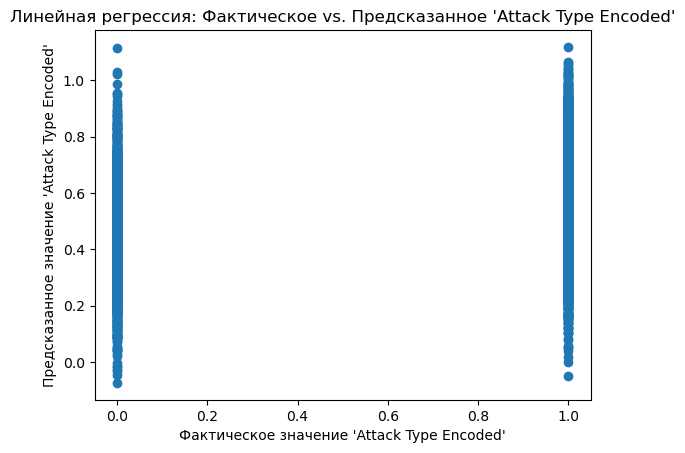

Точность на тестовых данных: 0.0
              precision    recall  f1-score   support

           0       0.36      0.65      0.46      1643
           1       0.85      0.64      0.73      5288

    accuracy                           0.64      6931
   macro avg       0.61      0.64      0.60      6931
weighted avg       0.74      0.64      0.67      6931



In [38]:
# Предсказание на тестовых данных с лучшими параметрами
linear_predictions = linear_grid.predict(X_test)

# Оценка качества модели регрессии
mae = mean_absolute_error(y_test, linear_predictions)
mse = mean_squared_error(y_test, linear_predictions)
r2 = r2_score(y_test, linear_predictions)

print("MAE: ", mae)
print("MSE: ", mse)
print("R^2: ", r2)

# Визуа`изация результатов регрессии
plt.scatter(y_test, linear_predictions)
plt.xlabel("Фактическое значение 'Attack Type Encoded'")
plt.ylabel("Предсказанное значение 'Attack Type Encoded'")
plt.title("Линейная регрессия: Фактическое vs. Предсказанное 'Attack Type Encoded'")
plt.show()

# Округление предсказанных значений до целых чисел (поскольку это классы)
rounded_predictions = [round(pred) for pred in linear_predictions]

print(f"Точность на тестовых данных: {accuracy}")
# Вывод отчета классификации
print(classification_report(y_test, rounded_predictions, zero_division=1))



Лучшие параметры для логистической регрессии: {'C': 1, 'penalty': 'l2'}
Отчет о классификации для логистической регрессии:
               precision    recall  f1-score   support

           0       0.63      0.10      0.18      1643
           1       0.78      0.98      0.87      5288

    accuracy                           0.77      6931
   macro avg       0.71      0.54      0.52      6931
weighted avg       0.74      0.77      0.71      6931



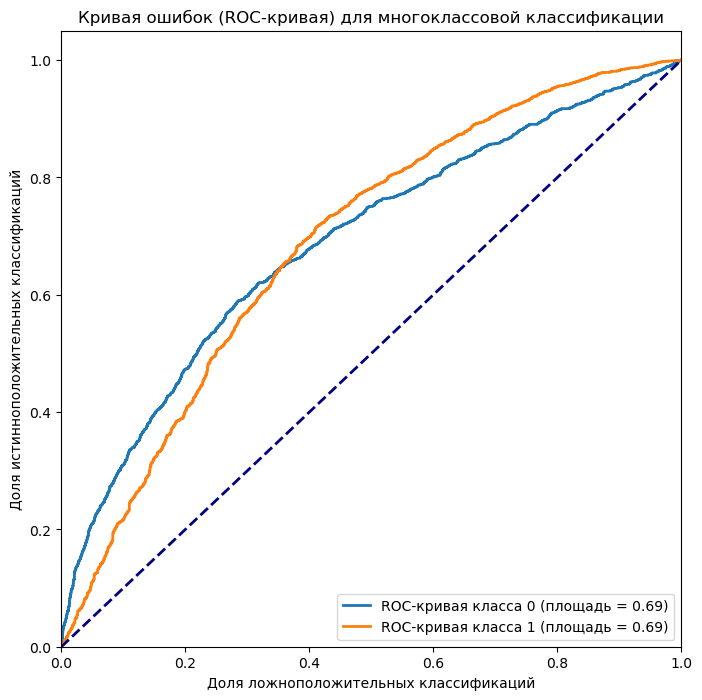

In [39]:
X = data.drop('Preferred foot Encoded', axis=1) 
y = data['Preferred foot Encoded']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
under_sampler = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

logistic_model = LogisticRegression(multi_class='auto', solver='liblinear', max_iter=1000)

logistic_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}

logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=5)
logistic_grid.fit(X_resampled, y_resampled)

print("Лучшие параметры для логистической регрессии:", logistic_grid.best_params_)

best_logistic_model = LogisticRegression(
    multi_class='auto',
    solver='liblinear',
    max_iter=1000,
    C=logistic_grid.best_params_['C'],
    penalty=logistic_grid.best_params_['penalty']
)

best_logistic_model.fit(X_train, y_train)

logistic_predictions = best_logistic_model.predict(X_test)
logistic_classification_report = classification_report(y_test, logistic_predictions)
print("Отчет о классификации для логистической регрессии:\n", logistic_classification_report)

logistic_probabilities = best_logistic_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):  
    fpr[i], tpr[i], _ = roc_curve(y_test == i, logistic_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 8))
for i in range(2):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC-кривая класса {0} (площадь = {1:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложноположительных классификаций')
plt.ylabel('Доля истинноположительных классификаций')
plt.title('Кривая ошибок (ROC-кривая) для многоклассовой классификации')
plt.legend(loc='lower right')
plt.show()